In [23]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import argparse

In [2]:
path = 'leaves_data/'

In [3]:
folders = [folder for folder in os.listdir(path)]

In [4]:
folders

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [5]:
data = pd.DataFrame(columns=['img', 'state'])

In [6]:
for i in range(len(folders)):
    for img in os.listdir(path + folders[i]):
        row = {'img': path + folders[i] + '/' + img,
               'state': folders[i]
              }
        data = data._append(row, ignore_index=True)

In [7]:
data.head()

,img,state
0,leaves_data/Anthracnose/20211008_124249 (Custo...,Anthracnose
1,leaves_data/Anthracnose/20211008_124250 (Custo...,Anthracnose
2,leaves_data/Anthracnose/20211008_124252 (Custo...,Anthracnose
3,leaves_data/Anthracnose/20211008_124253 (Custo...,Anthracnose
4,leaves_data/Anthracnose/20211008_124256 (Custo...,Anthracnose


In [8]:
data.shape

(4000, 2)

In [9]:
def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def resize(img_id):
    img = cv2.resize(img, (img_size[0], img_size[1]), intrepolation=cv2.INTER_AREA)
    return img

In [10]:
samples = data.drop_duplicates('state', ignore_index=True)

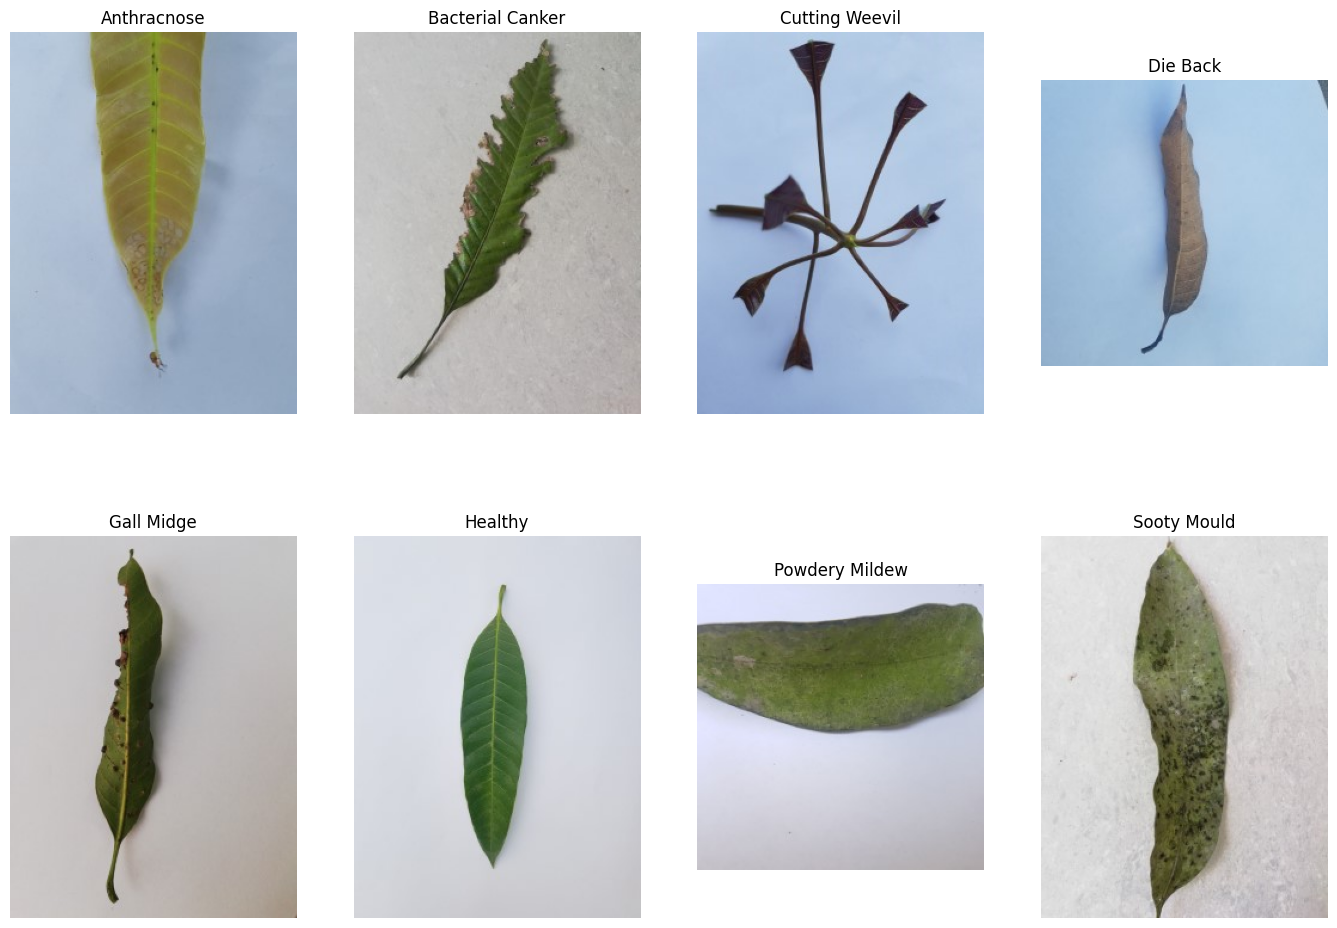

In [11]:
fig = plt.figure(figsize=(17, 12))
rows, cols = 2, 4

for i in range(8):
    label = samples['state'][i]

    fig.add_subplot(rows, cols, i + 1)
    
    plt.imshow((load_img(samples['img'][i])))
    plt.axis('off')
    plt.title(label)

In [12]:
classes = data.groupby(['state'], as_index=False).count()['state']
counts = data.groupby(['state'], as_index=False).count()['img']

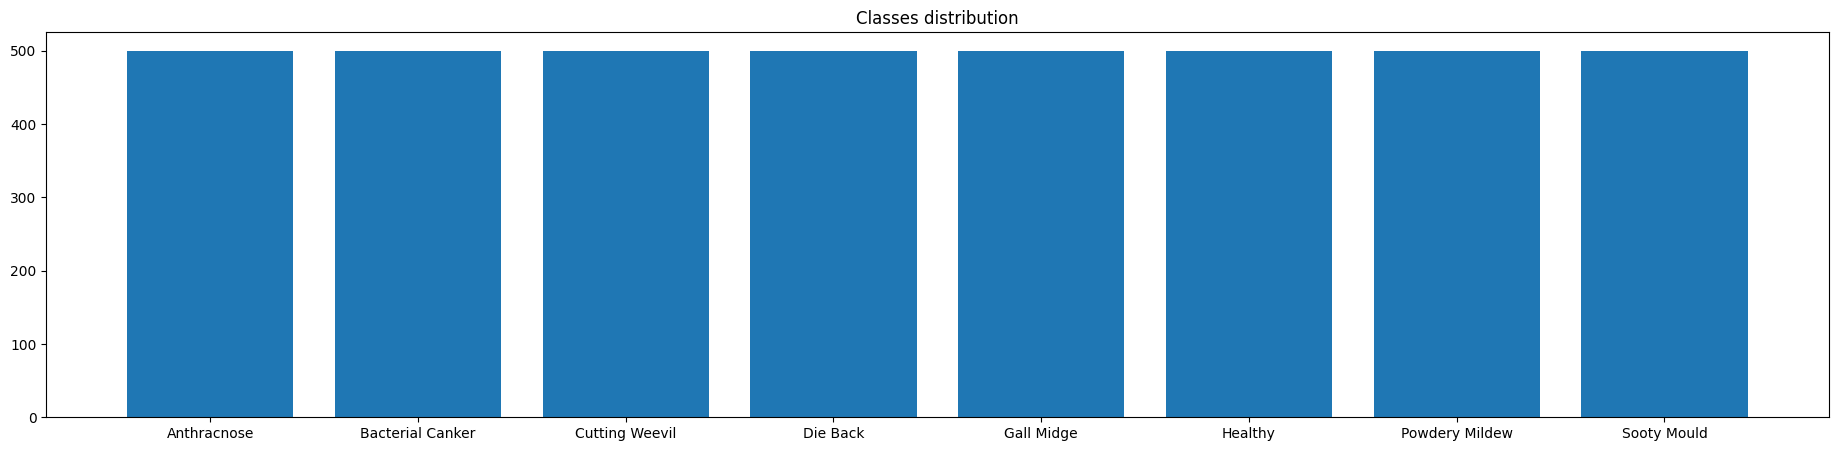

In [13]:
x = classes
y = counts

fig = plt.figure(figsize=(23, 5))
plt.bar(x, y)
plt.xticks()
plt.title("Classes distribution")

plt.show()

In [14]:
data['img'][:20]

0     leaves_data/Anthracnose/20211008_124249 (Custo...
1     leaves_data/Anthracnose/20211008_124250 (Custo...
2     leaves_data/Anthracnose/20211008_124252 (Custo...
3     leaves_data/Anthracnose/20211008_124253 (Custo...
4     leaves_data/Anthracnose/20211008_124256 (Custo...
5     leaves_data/Anthracnose/20211008_124301 (Custo...
6     leaves_data/Anthracnose/20211008_124302 (Custo...
7     leaves_data/Anthracnose/20211008_124305 (Custo...
8     leaves_data/Anthracnose/20211008_124306 (Custo...
9     leaves_data/Anthracnose/20211008_124310 (Custo...
10    leaves_data/Anthracnose/20211008_124312 (Custo...
11    leaves_data/Anthracnose/20211008_124334 (Custo...
12    leaves_data/Anthracnose/20211008_124336 (Custo...
13    leaves_data/Anthracnose/20211008_124341 (Custo...
14    leaves_data/Anthracnose/20211008_124345 (Custo...
15    leaves_data/Anthracnose/20211008_124457 (Custo...
16    leaves_data/Anthracnose/20211008_124501 (Custo...
17    leaves_data/Anthracnose/20211008_124522 (C

(np.float64(-0.5), np.float64(239.5), np.float64(319.5), np.float64(-0.5))

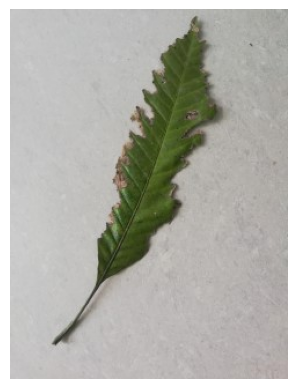

In [56]:
a = load_img(data['img'][500])
plt.imshow(a)
plt.axis('off')

In [17]:
red, green, blue = cv2.split(a)

zeros = np.zeros(blue.shape, np.uint8)

blueBGR = cv2.merge([zeros,zeros,blue])
greenBGR = cv2.merge([zeros,green,zeros])
redBGR = cv2.merge([red,zeros,zeros])

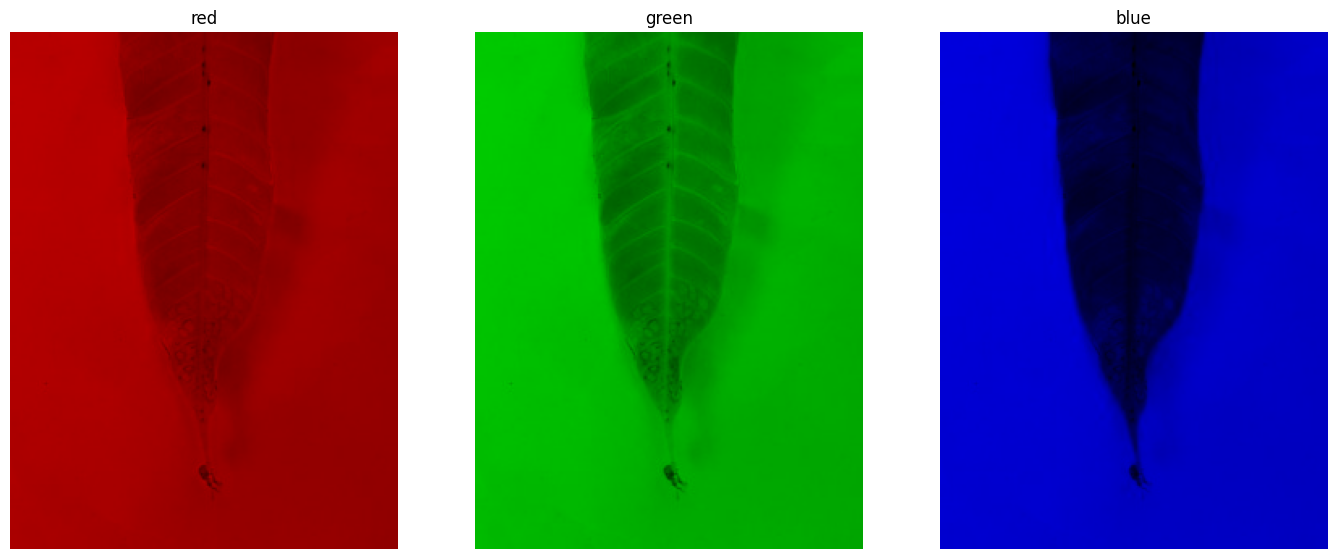

In [18]:
fig = plt.figure(figsize=(17, 12))
rows, cols = 1, 3

for i in range(3):
    label = ['red', 'green', 'blue'][i]

    fig.add_subplot(rows, cols, i + 1)
    
    plt.imshow([redBGR, greenBGR, blueBGR][i])
    plt.axis('off')
    plt.title(label)

In [19]:
data.groupby('state', as_index=False).count()

,state,img
0,Anthracnose,500
1,Bacterial Canker,500
2,Cutting Weevil,500
3,Die Back,500
4,Gall Midge,500
5,Healthy,500
6,Powdery Mildew,500
7,Sooty Mould,500


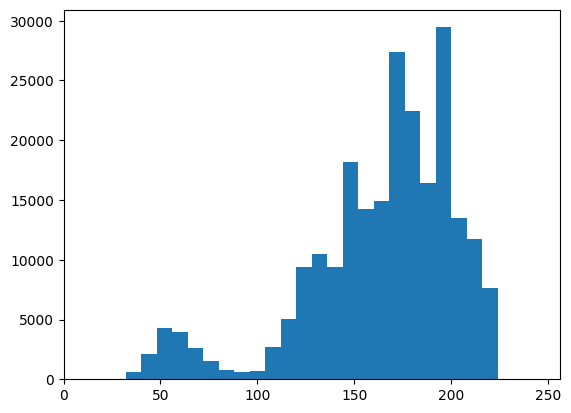

In [20]:
fig, ax = plt.subplots(1, 1)
ax.hist(a.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

In [65]:
segments = slic(a, n_segments = 300, sigma = 0.1)

(np.float64(-0.5), np.float64(239.5), np.float64(319.5), np.float64(-0.5))

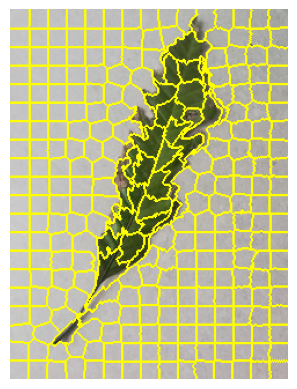

In [66]:
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(a, segments))
plt.axis("off")